In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


In [2]:
#load data
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

df.shape #lets check the dimensionality of the raw data

(12684, 26)

# Data Exploration
The dataset contains over 12000 instances and 26 attributes and is a supervised learning dataset.; this mean there is an input variable X and an out variable y.  

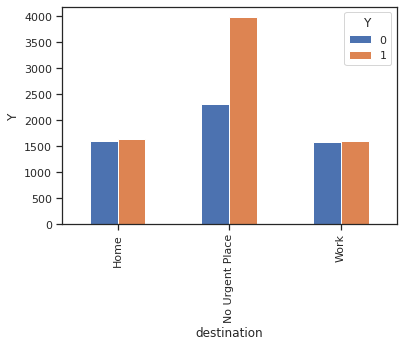

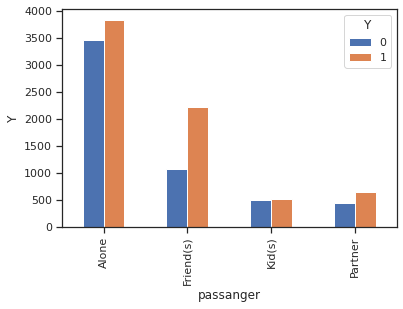

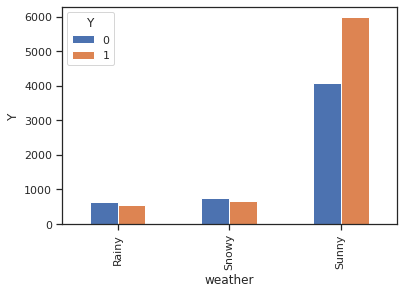

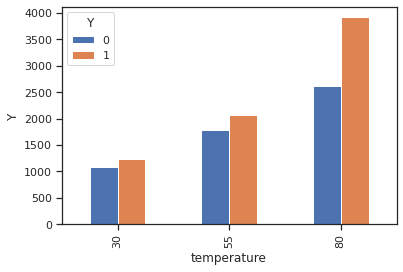

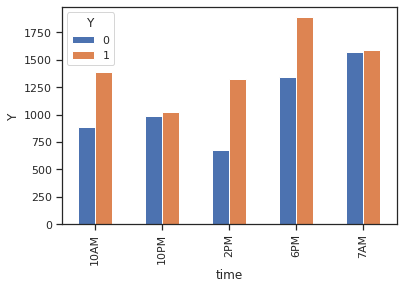

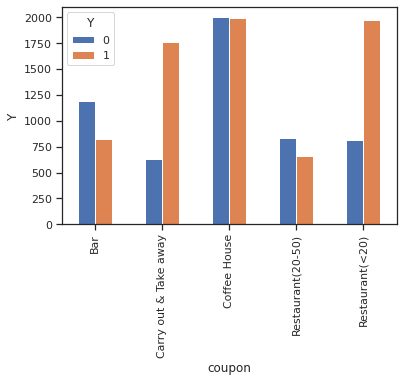

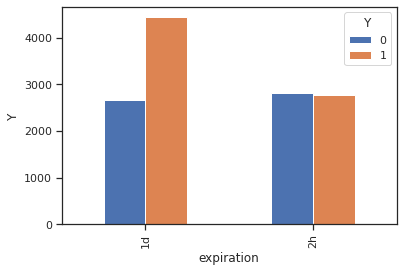

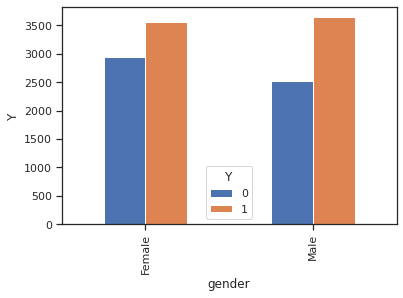

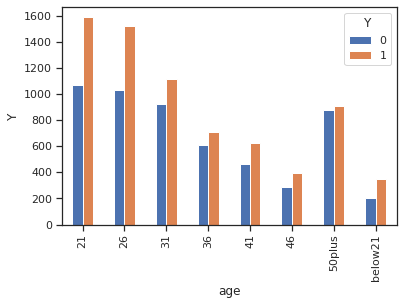

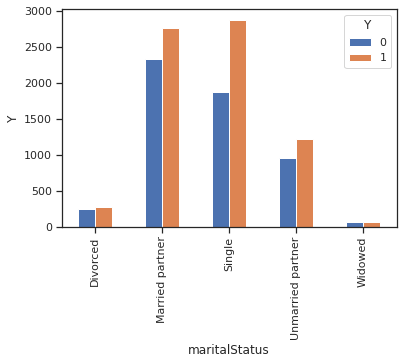

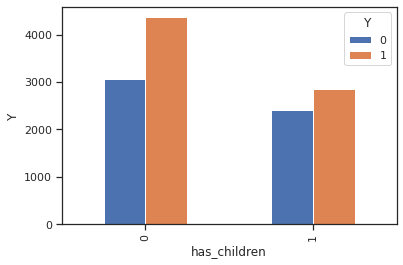

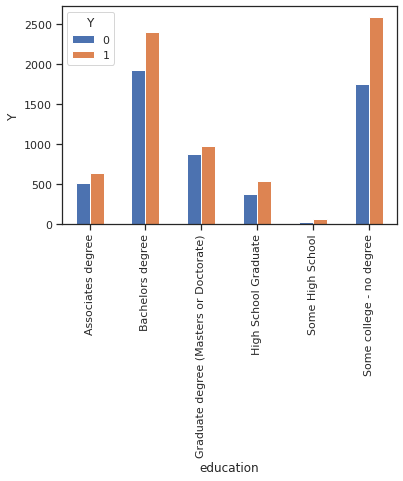

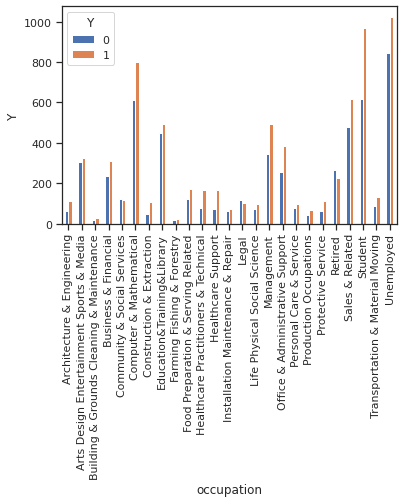

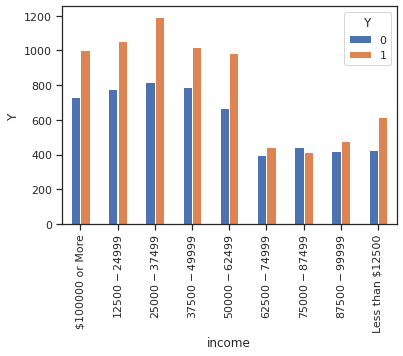

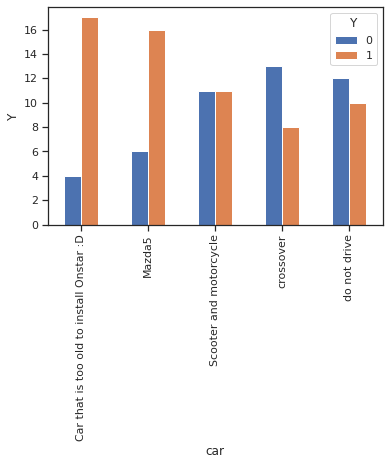

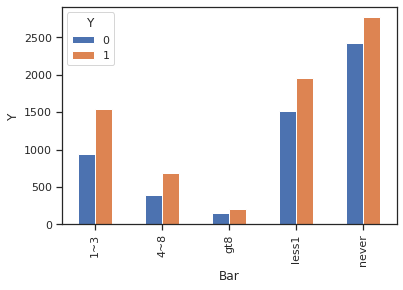

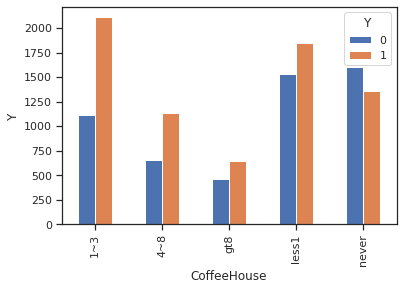

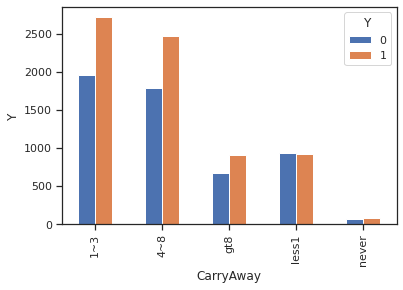

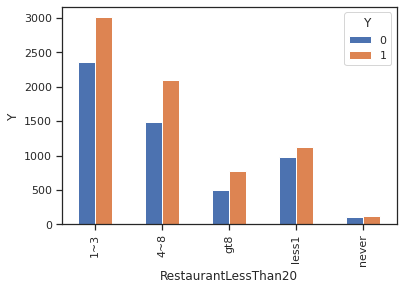

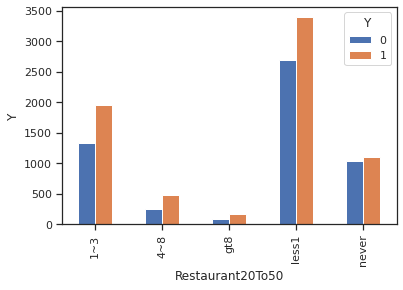

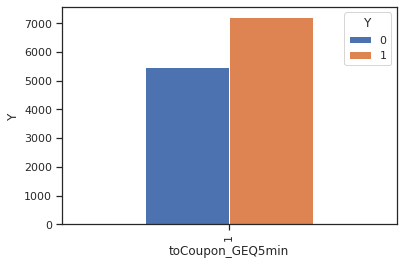

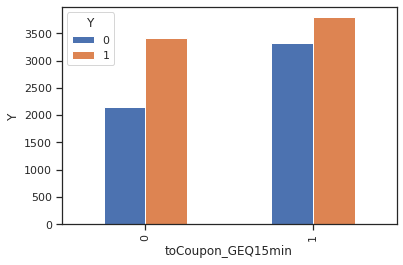

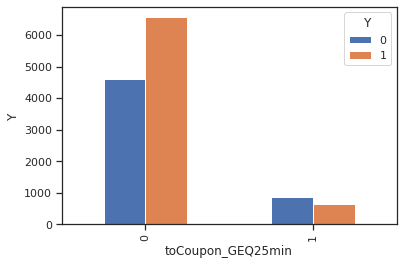

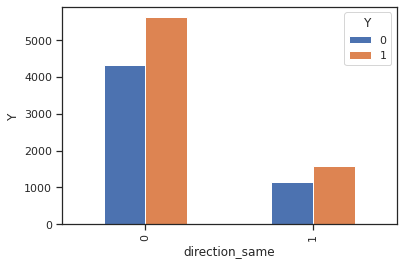

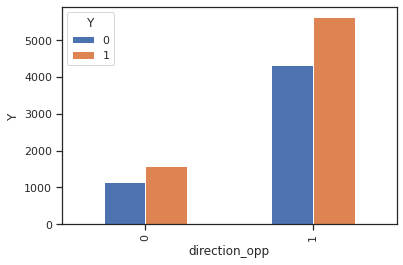

In [3]:
for col in df.drop('Y', axis=1).columns:
    pd.crosstab(df[col], df['Y']).plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Y')
    plt.show()

In [4]:
#load the data to understand the attributes and data types
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
#let's look at the data types
df.dtypes 

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

It seems that the data has some few numberical datatypes and the rest are string objects, however all the data can be categorized as being categorical datatypes with a mix of binary and ordinal datatypes.

In [6]:
#change temperature into a category as its an ordinal datatype
df['temperature']=df['temperature'].astype('category')

# Cleaning The Data

In [7]:
#check for empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  object  
 5   coupon                12684 non-null  object  
 6   expiration            12684 non-null  object  
 7   gender                12684 non-null  object  
 8   age                   12684 non-null  object  
 9   maritalStatus         12684 non-null  object  
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  object  
 12  occupation            12684 non-null  object  
 13  income                12684 non-null  object  
 14  car                   108 non-null    object  
 15  Ba

Several columns have missing values, and the 'car' variable has only 108 non-null values; more than 99 percent of the values are NaN. We can simply drop it off. These variables are insufficient, so it is best to remove them entirely from the data to avoid modeling inaccuracies.

In [8]:
df["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [9]:
df.drop('car', inplace=True, axis=1)

Let's iterate through the pandas table to find all the columns with empty or NaN values, and then for each column, the code will find the variable with the highest count and fill the empty values with the variable with the highest count.
In categorical data, empty values can be removed or replaced with the most frequent value in each column.

In [10]:
df.isnull().sum().sort_values(ascending=False)

CoffeeHouse             217
Restaurant20To50        189
CarryAway               151
RestaurantLessThan20    130
Bar                     107
destination               0
income                    0
direction_opp             0
direction_same            0
toCoupon_GEQ25min         0
toCoupon_GEQ15min         0
toCoupon_GEQ5min          0
occupation                0
passanger                 0
education                 0
has_children              0
maritalStatus             0
age                       0
gender                    0
expiration                0
coupon                    0
time                      0
temperature               0
weather                   0
Y                         0
dtype: int64

In [11]:
for x in df.columns[df.isna().any()]:
    df = df.fillna({x: df[x].value_counts().idxmin()})

In [12]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [13]:
#change Object datatypes to Categorical datatypes)

df_obj = df.select_dtypes(include=['object']).copy()

for col in df_obj.columns:
    df[col]=df[col].astype('category')
    
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [14]:
#lets do some statistcal analysis
df.describe()

,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

According to the above description, 'toCoupon GEQ5min' has only one unique variable, which won't help much with the encoding of the categorical variables. As a result, it is preferable to remove that column.

In [16]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

In [17]:
categ = ['destination', 'passanger','weather', 'temperature', 'time','coupon','expiration',
                                  'gender','age','maritalStatus','education',
                               'occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [18]:
#generating dummy variable from the categorical
df = pd.get_dummies(df,columns = ['destination', 'passanger','weather', 'temperature', 'time','coupon','expiration',
                                  'gender','age','maritalStatus','education',
                               'occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])

In [19]:
df.head()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_0,destination_1,destination_2,passanger_0,...,RestaurantLessThan20_0,RestaurantLessThan20_1,RestaurantLessThan20_2,RestaurantLessThan20_3,RestaurantLessThan20_4,Restaurant20To50_0,Restaurant20To50_1,Restaurant20To50_2,Restaurant20To50_3,Restaurant20To50_4
0,1,0,0,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [20]:
df.shape

(12684, 111)

We are going to create feature vectors for our modeling by using the LabelEnconder and OneHotEncoder.

# Data Modeling

In [21]:
df.head()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_0,destination_1,destination_2,passanger_0,...,RestaurantLessThan20_0,RestaurantLessThan20_1,RestaurantLessThan20_2,RestaurantLessThan20_3,RestaurantLessThan20_4,Restaurant20To50_0,Restaurant20To50_1,Restaurant20To50_2,Restaurant20To50_3,Restaurant20To50_4
0,1,0,0,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [22]:
#Train_Test splitting
X = df.drop(['Y'],axis=1)
y = df['Y']
X.head()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_0,destination_1,destination_2,passanger_0,passanger_1,...,RestaurantLessThan20_0,RestaurantLessThan20_1,RestaurantLessThan20_2,RestaurantLessThan20_3,RestaurantLessThan20_4,Restaurant20To50_0,Restaurant20To50_1,Restaurant20To50_2,Restaurant20To50_3,Restaurant20To50_4
0,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,1,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,1,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [23]:
X.shape

(12684, 110)

In [24]:
y.shape

(12684,)

In [25]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

## Random Forest


In [27]:
rf = RandomForestClassifier()
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

## Stratified Kfold

In [28]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    rf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(rf.score(x_test_fold, y_test_fold))

In [29]:
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))
print('\nmean is:', mean(lst_accu_stratified))

List of possible accuracy: [0.760441292356186, 0.7667454688731284, 0.7793538219070134, 0.7801418439716312, 0.7460567823343849, 0.7476340694006309, 0.7555205047318612, 0.749211356466877, 0.7444794952681388, 0.7760252365930599]

Maximum Accuracy That can be obtained from this model is: 78.01418439716312 %

Minimum Accuracy: 74.44794952681389 %

Overall Accuracy: 76.05609871902912 %

Standard Deviation is: 0.01415900916404532

mean is: 0.7605609871902912


In [30]:
#Predict the response for test dataset
y_pred_LR = rf.predict(x_test_fold)

print(classification_report(y_test_fold, y_pred_LR))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       547
           1       0.78      0.85      0.81       721

    accuracy                           0.78      1268
   macro avg       0.78      0.76      0.77      1268
weighted avg       0.78      0.78      0.77      1268



In [31]:
cross_valid_scores = {}
SEED=42

In [32]:
%%time
parameters = {
    'n_estimators': [400,450,500],
               'criterion':['gini','entropy'],
                    'max_depth': [15, 20, 25],
                        'min_samples_split': [2,3],
}

model_random_forest = RandomForestClassifier(
    random_state=SEED,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=10,
    scoring='accuracy',
    n_jobs = -1,
)

model_random_forest.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 3, 'n_estimators': 500}
Mean cross-validated accuracy score of the best_estimator: 0.764
-----
CPU times: user 11.9 s, sys: 383 ms, total: 12.2 s
Wall time: 22min 46s


<AxesSubplot:>

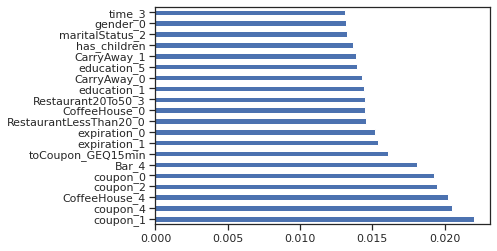

In [33]:
best_rf = model_random_forest.best_estimator_.fit(X_train,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [34]:
y_pred = model_random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69      1095
           1       0.76      0.83      0.79      1442

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.75      2537



## Logistic regression

In [36]:
%%time
parameters = {'solver' : ['liblinear'],
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_logistic_regression = LogisticRegression(
    random_state=SEED,
    class_weight="balanced",
   
)

model_logistic_regression = GridSearchCV(
    model_logistic_regression, 
    parameters, 
    cv=10,
    n_jobs = -1,
    scoring='accuracy',
)

model_logistic_regression.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_logistic_regression.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_logistic_regression.best_score_:.3f}'
)
cross_valid_scores['logistic_regression'] = model_logistic_regression.best_score_
print('-----')

-----
Best parameters {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Mean cross-validated accuracy score of the best_estimator: 0.680
-----
CPU times: user 420 ms, sys: 12.3 ms, total: 433 ms
Wall time: 10.8 s


In [37]:
preds = model_logistic_regression.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63      1095
           1       0.72      0.68      0.70      1442

    accuracy                           0.67      2537
   macro avg       0.66      0.67      0.66      2537
weighted avg       0.67      0.67      0.67      2537



## K-Nearest Neighbors

In [42]:
%%time
parameters = {'n_neighbors' : [3,5,7,9],
              
              'p' : [1,2],
    "weights": ["uniform", "distance"]
}

model_k_neighbors = KNeighborsClassifier(
)

model_k_neighbors = GridSearchCV(
    model_k_neighbors, 
    parameters, 
    cv=10,
    n_jobs = -1,
    scoring='accuracy',
)

model_k_neighbors.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_k_neighbors.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_k_neighbors.best_score_:.3f}'
)
cross_valid_scores['k_neighbors'] = model_k_neighbors.best_score_
print('-----')

-----
Best parameters {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Mean cross-validated accuracy score of the best_estimator: 0.694
-----
CPU times: user 605 ms, sys: 79.7 ms, total: 685 ms
Wall time: 3min 23s


In [43]:
predictions = model_k_neighbors.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1095
           1       0.70      0.77      0.73      1442

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537



In [44]:
pd.DataFrame(cross_valid_scores, index=['cross_valid_score']).T

,cross_valid_score
random_forest,0.764461
logistic_regression,0.679515
k_neighbors,0.693901


Random forest has the highest accuracy amongst the other models. 

For machine learning models, achieving a good prediction model is extremely crucial. It involves achieving a balance between underfitting and overfitting or ie. a trade-off between bias and variance.

When it comes to classification, the precision-recall trade-off is a fundamentally important metric to investigate.


Precision is the ratio between the True Positive and all Positives. For this problem it would be the measure of drivers that were correctly identified using a coupon out of all the drivers actually using it.

Recall is the measure of our model correctly identifying True Positives. Thus all the drivers who actually accepted a coupon, recall tells how many we correctly identified as accepting a coupon.


In [45]:


cm= confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Truth'], colnames =['Predicted'], margins = True)


Predicted,0,1,All
Truth,,,
0,711,384,1095
1,241,1201,1442
All,952,1585,2537


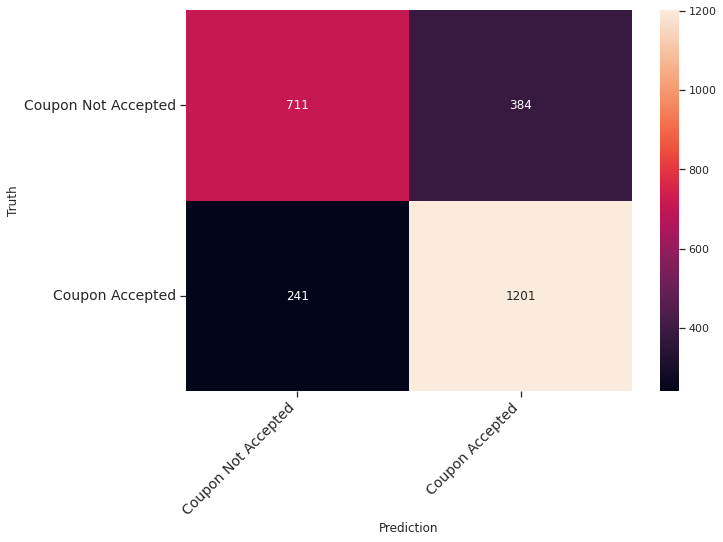

In [46]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError()
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

print_confusion_matrix(cm,["Coupon Not Accepted", "Coupon Accepted"])

A confusion matrix helps us gain an insight into how correct our predictions were and how they hold up against the actual values.

## ROC Curves

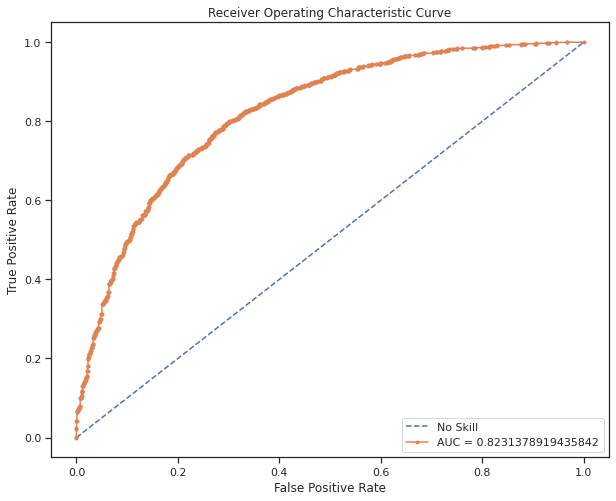

In [47]:

y_pred_proba =model_random_forest.predict_proba(X_test)[:,1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print(f'Receiver Operating Characteristic AUC = {roc_auc}')

plt.figure(figsize = (10,8))
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, thresholds_ = roc_curve(y_test, y_pred_proba)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='AUC = '+str(roc_auc))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
# show the legend
plt.legend(loc=4)
# show the plot
plt.show()

## Precision-Recall Curve (PRC)

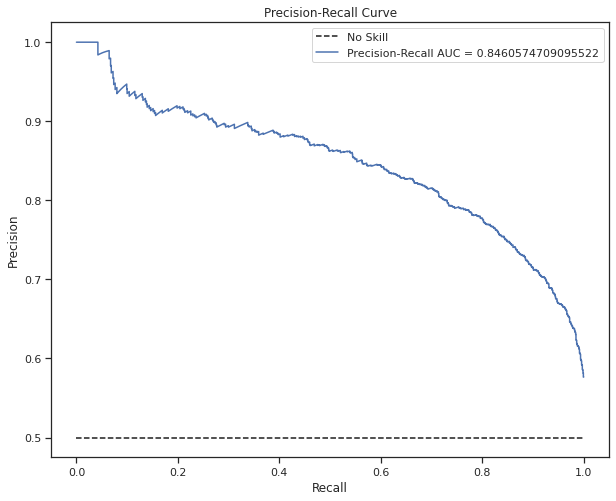

In [48]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--', label = 'No Skill')
prc_auc = auc(recall, precision)
plt.plot(recall, precision, label = 'Precision-Recall AUC = '+str(prc_auc))
plt.legend(loc=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

At the lowest point (0,0), the threshold is set to 1 which means the model make no distinctions between drivers who use coupons and drivers who do not use coupons.
The highest point (1,1), the threshold is set at 0 which means that both precision and recall are high and the model makes distinctions perfectly. 

The rest of the curve is the values of Precision and Recall for the threshold values between 0 and 1. Our aim is to make the curve as close to (1, 1) 
Area Under Curve(AUC). Consider this area as a metric of a good model. The AUC ranges from 0 to 1.Therefore higher AUC is the best